In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [4]:
# func to gen plane from three points
def generate_plane(p1, p2, p3):
    v1 = np.array(p2) - np.array(p1)
    v2 = np.array(p3) - np.array(p1)
    normal = np.cross(v1, v2)

    # Ax + By + Cz = D
    A, B, C = normal
    D = -np.dot(normal, p1) # dot product
    
    x = np.linspace(min(p1[0], p2[0], p3[0]) - 5, max(p1[0], p2[0], p3[0]) + 5, 10)
    y = np.linspace(min(p1[1], p2[1], p3[1]) - 5, max(p1[1], p2[1], p3[1]) + 5, 10)
    X, Y = np.meshgrid(x, y)

    # solve for z
    Z = (-A * X - B * Y - D) / C

    return X, Y, Z

In [5]:
# building coord
buildings = {
    "Roman Forum": [(25, 50, -10), (24, 41, -10), (49, 42, -10)],
    "Roman Thermae": [(12, 22, -10), (29, 21, -10), (30, 34, -10)],
    "Visigoth Baptistry": [(21, 4, -10), (7, 21, -10), (7, 17, -10)],
    "Islamic Alcazar": [(19, 8, -10), (29, 4, -10), (30, 8, -10)],
    "Contemporary Glass Pool": [(12, 22, 0), (29, 21, 0), (30, 34, 0)],
}


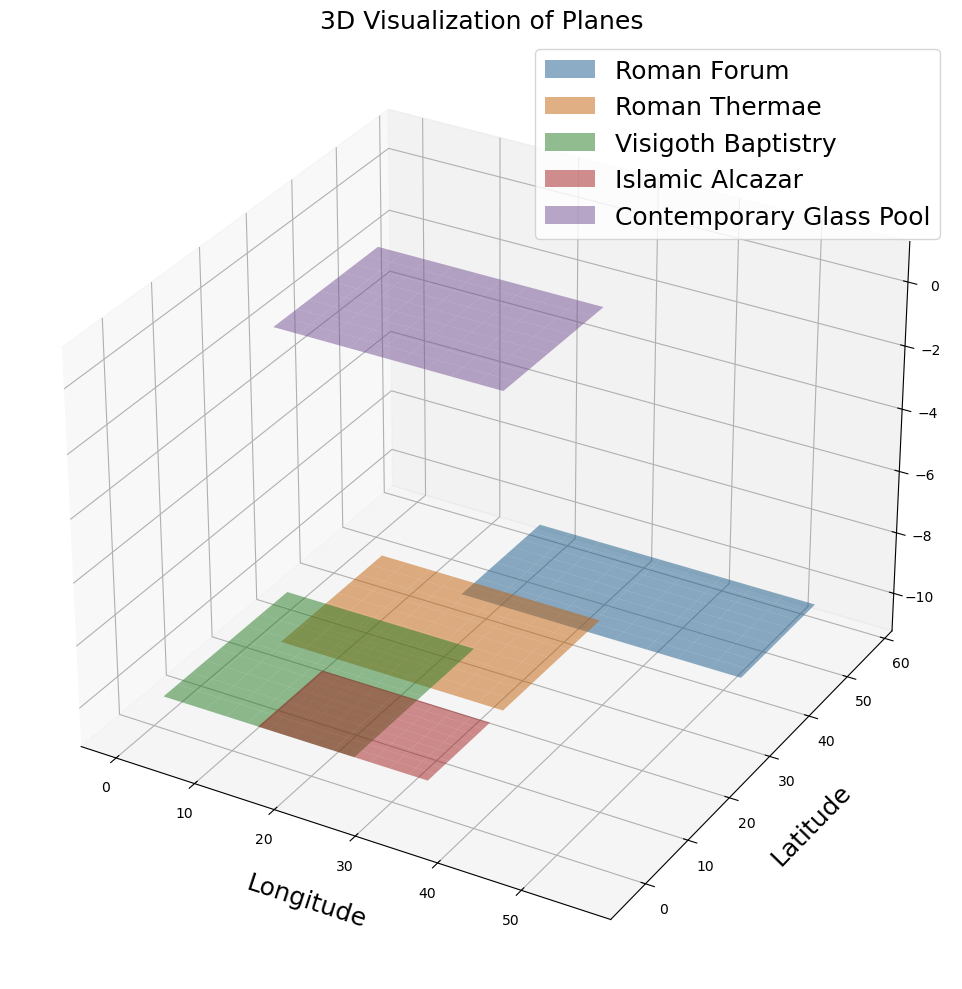

In [13]:
# init 3d plot
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# plot planes for each bldg
for name, coords in buildings.items():
    p1, p2, p3 = coords
    X, Y, Z = generate_plane(p1, p2, p3)
    ax.plot_surface(X, Y, Z, alpha=0.5, label=name)

ax.set_title("3D Visualization of Planes", fontsize=18) 
ax.set_xlabel("Longitude", labelpad=15, fontsize=18) 
ax.set_ylabel("Latitude", labelpad=15, fontsize=18) 
ax.set_zlabel("Elevation location", labelpad=15, fontsize=18) 

# prevent clipping
plt.tight_layout()  # Automatically adjusts layout
ax.margins(0.1, 0.1, 0.1)  # Add margins

# legend
plt.legend(loc='upper right', fontsize = 18)

plt.show()